In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf
from keras.models import load_model
import numpy as np
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
model1 = tf.keras.models.load_model('/content/drive/My Drive/plantdisease30_1_1_1(resnet50,0.1test,0.001lr).h5')

In [0]:
test_DIR = '/content/drive/My Drive/Dataset/test_google/test_images_google'
X=[]

In [0]:
def make_test(plantdisease_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224, 224))
        
        X.append(np.array(img))

In [6]:
from tqdm import tqdm
import os
import cv2
make_test('test' , test_DIR)

100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


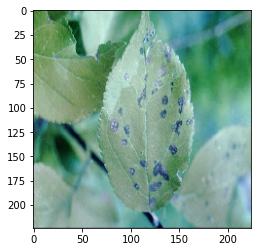

In [7]:
plt.imshow(X[0])

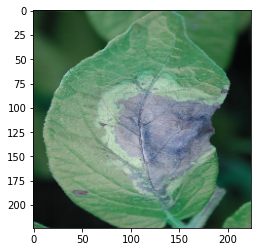

In [8]:
plt.imshow(X[1])

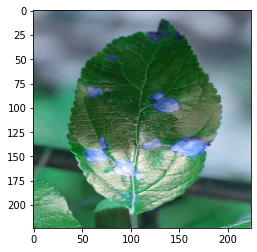

In [9]:
plt.imshow(X[2])

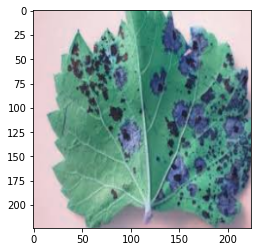

In [10]:
plt.imshow(X[3])

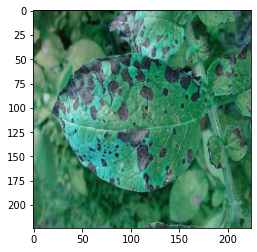

In [11]:
plt.imshow(X[4])

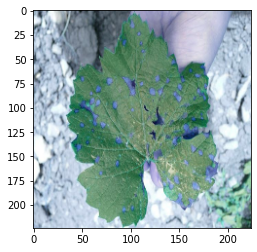

In [12]:
plt.imshow(X[5])

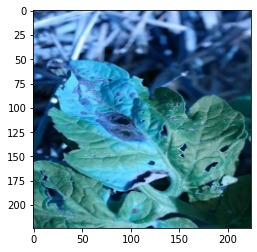

In [13]:
plt.imshow(X[6])

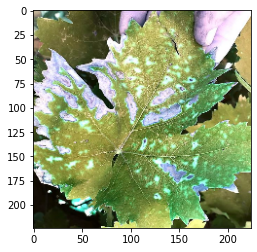

In [14]:
plt.imshow(X[7])

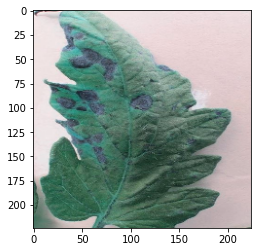

In [15]:
plt.imshow(X[8])

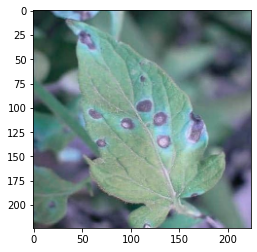

In [16]:
plt.imshow(X[9])

In [0]:
X = np.array(X)
X = X/255

In [0]:
predictions = model1.predict(X)

[2.0358742e-04 1.7687029e-05 5.1193223e-03 5.1687224e-05 1.1948848e-02
 2.2367189e-04 2.0968153e-01 5.9693258e-02 7.1298039e-01 7.9998717e-05]
tomato_septoria_spot


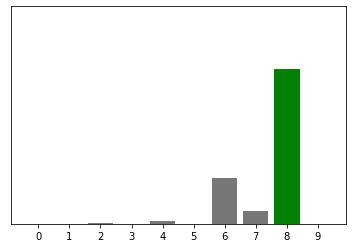

In [41]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('green')

a = 4

probabilitas = predictions[a]
kategori = np.argmax(predictions[a])
if kategori == 0: kategori = 'apple_scab'
if kategori == 1: kategori = 'apple_black_rot'
if kategori == 2: kategori = 'grape_black_rot'
if kategori == 3: kategori = 'grape_esca'
if kategori == 4: kategori = 'grape_leaf_blight'
if kategori == 5: kategori = 'potato_early_blight'
if kategori == 6: kategori = 'potato_late_blight'
if kategori == 7: kategori = 'tomato_bacterial_spot'
if kategori == 8: kategori = 'tomato_septoria_spot'
if kategori == 9: kategori = 'tomato_target_spot'

print(probabilitas)
print(kategori)
try:
  plot_value_array(1, predictions[a], [0,1,2,3,4,5,6,7,8,9])
  _ = plt.xticks(range(10), class_names, rotation=45)
except Exception as e: pass